In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance

In [4]:
# Feature Importance
# What features are considered important?
# guided by https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression().fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mdl.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

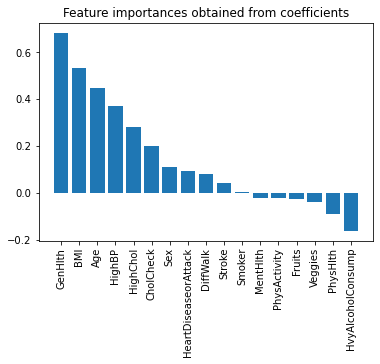

In [5]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

According to the data, GenHlth, BMI, Age, HighBP, and CholCheck are the features that have a bigger affect on the outcome of predicting diabetes in a patient.

Interestingly, heavy alcholol consumption has a negative correlation to predicting diabetes.

# Data Exploration

In [6]:
# What is the correlation of Age and Diabetes?
corr = df['Age'].corr(df['Diabetes'])
corr

0.278738066281904

In [7]:
# What is the correlation of Sex and Diabetes?
# "Does gender affect diabetes?"
corr = df['Sex'].corr(df['Diabetes'])
corr

0.044412858371259405

In [8]:
type(df['Age'].index)

pandas.core.indexes.range.RangeIndex

In [9]:
# Which age group has the most occurences of diabetes?

diabetic_lst = []
non_diabetic_lst = []

for index, row in df.iterrows():
    if row['Diabetes'] == 1:
        diabetic_lst.append(row)
    else:
        non_diabetic_lst.append(row)

In [10]:
diabetic_df = pd.DataFrame(diabetic_lst)
non_diabetic_df = pd.DataFrame(non_diabetic_lst)

Text(0, 0.5, 'Sum of Diabetics')

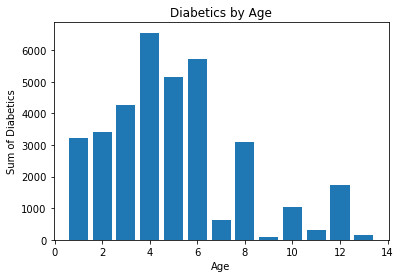

In [11]:
# graphing by age grouping. (see the website page for breakdown of bins from Kaggle)
fig, ax = plt.subplots()

labels = diabetic_df['Age'].unique()
sums = diabetic_df.groupby(by=['Age']).count()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

According to our data, the ages are grouped by this schema: 

"13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older"

We can infer from this data that each number is equivalent to 5 years. If this is true, then age group 4 would be the ages of 35 to 39, age group 5 would be 40 to 44, age group 6 is 45 to 49. 

How do these age groups compare in terms of health?
    - can we compare the age groups by general health?

Text(0, 0.5, 'Sum of Diabetics')

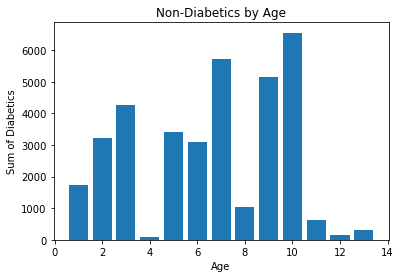

In [38]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['Age'].unique()
sums = df.groupby(by=['Age']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Non-Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

Interestingly, age group 4 (ages 35 to 39) is simultaniously the largest majority of diabetics as well as the the lowest amount of diabetics. 

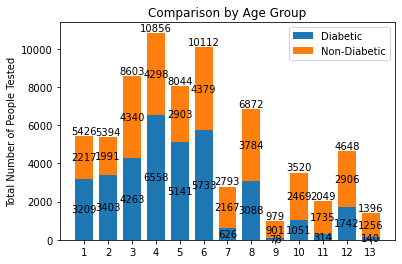

<Figure size 720x720 with 0 Axes>

In [13]:
# how do these graphs compare?
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py

# ==============================
# need to clean this chart later
# ==============================

labels = diabetic_df['Age'].unique()
diabetic = list(diabetic_df.groupby(by=['Age']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['Age']).count()['Diabetes'])
width = .75       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by Age Group')
ax.set_xticks(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)


plt.show()

In [14]:
# Splitting the dataframe to their respective age groups.

lst_age_4 = []
lst_age_5 = []
lst_age_6 = []

for col, row in df.iterrows():
    if row['Age'] == 4:
        lst_age_4.append(row)
    if row['Age'] == 5:
        lst_age_5.append(row)
    if row['Age'] == 6:
        lst_age_6.append(row)
        
# to dataframe

age_4_df = pd.DataFrame(lst_age_4)
age_5_df = pd.DataFrame(lst_age_5)
age_6_df = pd.DataFrame(lst_age_6)
age_6_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0
20,6.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,6.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
38,6.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Splitting the dataframe by their respective sex.

# according to data, male = 1
lst_sex_male = []
lst_sex_female = []

for col, row in df.iterrows():
    if row['Sex'] == 1:
        lst_sex_male.append(row)
    else:
        lst_sex_female.append(row)

# convert to DF
male_df = pd.DataFrame(lst_sex_male)
female_df = pd.DataFrame(lst_sex_female)
female_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# What is the correlation of BMI and Diabetes?
corr = df['BMI'].corr(df['Diabetes'])
corr

0.29337274476104636

In [28]:
# What is the correlation of General Health and Diabetes?
corr = df['GenHlth'].corr(df['Diabetes'])
corr

0.40761159849491363

Text(0, 0.5, 'Sum of Diabetics')

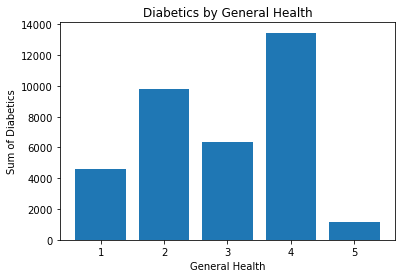

In [49]:
# graphing by general health for diabetics
fig, ax = plt.subplots()

labels = diabetic_df['GenHlth'].unique()
sums = diabetic_df.groupby(by=['GenHlth']).count()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Diabetics by General Health')
ax.set_ylabel('Sum of Diabetics')

Text(0, 0.5, 'Sum of Diabetics')

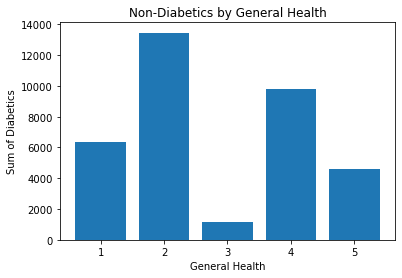

In [50]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['GenHlth'].unique()
sums = df.groupby(by=['GenHlth']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Non-Diabetics by General Health')
ax.set_ylabel('Sum of Diabetics')

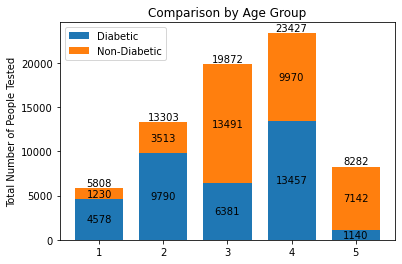

<Figure size 720x720 with 0 Axes>

In [51]:
labels = diabetic_df['GenHlth'].unique()
diabetic = list(diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by Age Group')
ax.set_xticks(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)


plt.show()

The highest percentage non diabetics is at 5, and the lowerest percentage is at 1 which is expected if general health correlates with diabetes. What stands out though is the fact that people with health 3 has a notably highest percentage of non diabetics than people in the group with health 4.

# Machine Learning

In [17]:
# extracting important features
# Would leaving in PhysHealth, and HvyAlcoholConsump help our model train?
# Because if we leave it in there it would tell the model something along the lines of
# "if it has this feature, they probably don't."
unimportant_features_df = df[['Fruits','MentHlth','PhysActivity','Veggies','PhysHlth','HvyAlcoholConsump']]
important_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Sex', 'HeartDiseaseorAttack', 'DiffWalk', 'Stroke']]

In [18]:
# Train the Logistic Regression model using the orignal dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [19]:
# Calculated the balanced accuracy score of the orignal dataframe
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7509139208400846

In [20]:
# Display the confusion matrix of the orignal dataframe
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6454, 2352],
       [2049, 6818]], dtype=int64)

In [21]:
# Print the imbalanced classification report of the orignal dataframe
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.73      0.77      0.75      0.75      0.56      8806
        1.0       0.74      0.77      0.73      0.76      0.75      0.57      8867

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



In [22]:
# extracting top 6 important features
top6_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck']]

#Scaling the Data with the important features used above
X_important = top6_features_df
y_important = df['Diabetes']
X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important, y_important)

scaler = StandardScaler()
X_important_train_scaled = scaler.fit_transform(X_important_train)
X_important_test_scaled = scaler.transform(X_important_test)

In [23]:
# Train the Logistic Regression model using the important dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_important_train_scaled, y_important_train)

LogisticRegression(random_state=1)

In [24]:
# Calculated the balanced accuracy score of the important dataframe
y_important_pred = model.predict(X_important_test_scaled)
balanced_accuracy_score(y_important_test, y_important_pred)

0.7451650465885843

In [25]:
# Display the confusion matrix of the important dataframe
confusion_matrix(y_important_test, y_important_pred)

array([[6411, 2455],
       [2050, 6757]], dtype=int64)

In [26]:
# Print the imbalanced classification report of the important dataframe
print(classification_report_imbalanced(y_important_test, y_important_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.72      0.77      0.74      0.74      0.55      8866
        1.0       0.73      0.77      0.72      0.75      0.74      0.56      8807

avg / total       0.75      0.75      0.75      0.74      0.74      0.55     17673



Extracting important features barely effected results of the accuracy of the logicsitc regression model.

The actual machine learning model will likely have a bigger impact on predictions than the columns included or not.

In [ ]:
# extracting top 3 important features
top3_features_df = df[['GenHlth', 'BMI', 'Age']]